# Evaluation and analysis

In [1]:
import os
import random

### Setting paths and environment variables:

In [2]:
os.chdir('..')

In [3]:
os.getcwd()

'/home/ander/PycharmProjects/nnunet-ms-segmentation'

### Generic:

In [4]:
from custom_scripts.A_config import (
    NNUNET_RAW_PATH,
    TRAIN_IMAGES_DIR,
    Dataset
)

## Analysing specific cases:

In [5]:
DATASET = Dataset.train_split

In [6]:
import custom_scripts.utils as utils

In [7]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [8]:
train_images = os.listdir(TRAIN_IMAGES_DIR)
train_ids = sorted({file_name.split(".")[0][:-5] for file_name in train_images})

In [9]:
# sample_case_num_idx = 7  # or sample from range(len(test_ids))
sample_case_id = "FIS_046_01"  #train_ids[sample_case_num_idx]
sample_labels_path = utils.get_paths(
    case_id=sample_case_id,
    dataset=DATASET,
    labels=True
)

In [10]:
sample_b_image, sample_fu_image = utils.read_images(case_id=sample_case_id, dataset=DATASET)
sample_labels = utils.read_labels(case_id=sample_case_id, dataset=DATASET)

In [11]:
sample_b_image.shape

(182, 218, 182)

In [12]:
sample_b_image_path, sample_fu_image_path = utils.get_paths(case_id=sample_case_id, dataset=DATASET,
                                                            basal_im=True, follow_up_im=True)
raw_sample_b_image = nib.load(sample_b_image_path)

In [13]:
print(raw_sample_b_image)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (182, 218, 182)
affine:
[[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 182 218 182   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.  1.  1.  1.  0.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'6.0.5:9e026117'
aux_file        : b''
qform_code      : m

In [14]:
nib.aff2axcodes(raw_sample_b_image.affine)

('L', 'A', 'S')

[La orientación de los vóxeles es](https://github.com/eloydelas/lesion-segmentation-challenge-miccai21/blob/main/TFM_Implementacion.ipynb):

+ El primer eje va de derecha a izquierda (plano sagital);
+ El segundo eje va de detrás a adelante (plano coronal);
+ El tercer eje va de inferior a superior (plano axial).

In [15]:
IMAGES_SHAPE = sample_b_image.shape

In [16]:
IMAGES_SHAPE

(182, 218, 182)

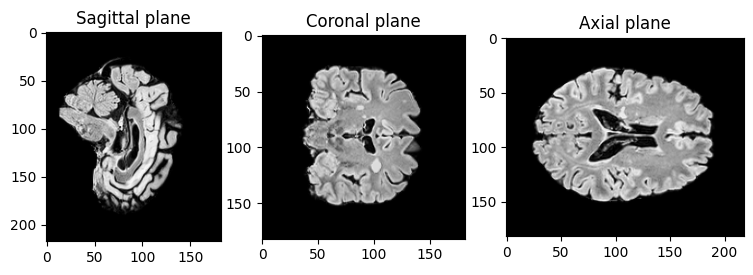

In [17]:
from custom_scripts.plotting import axes_plot

axes_plot(sample_b_image)

### Visualizaciones de las imágenes y las máscaras:

In [18]:
from custom_scripts.utils import get_lesions_locations

In [19]:
ANALYSIS_DIR = NNUNET_RAW_PATH / "Analysis"
try:
    os.mkdir(ANALYSIS_DIR)
except FileExistsError:
    pass

#### Lesiones basales

In [ ]:
from custom_scripts.plotting import plot_basal_lesion

In [369]:
basal_lesion_locations = get_lesions_locations(labels=sample_labels, lesion_class=1)

In [377]:
def save_all_basal_lesions(case_id, basal_lesion_locs, basal_image, follow_image, labels):
    for basal_lesion in basal_lesion_locs.keys():
        basal_lesion_central_voxel = random.choice(basal_lesion_locs[basal_lesion])
        basal_lesion_centroid = tuple(np.mean(basal_lesion_locs[basal_lesion], axis=0).astype(int))
        figure = plot_basal_lesion(b_im=basal_image, fu_im=follow_image, labels=labels,
                                   central_voxel=basal_lesion_central_voxel, patch_size=30)
        _ = figure.savefig(ANALYSIS_DIR / f"{case_id}_BASAL_{basal_lesion_centroid}.png")
        plt.close()

In [378]:
# save_all_basal_lesions(case_id=sample_case_id, basal_lesion_locs=basal_lesion_locations,
#                        basal_image=sample_b_image, follow_image=sample_fu_image, labels=sample_labels)

In [ ]:
sample_basal_lesion = random.choice(list(basal_lesion_locations.keys()))
sample_basal_lesion_central_voxel = random.choice(basal_lesion_locations[sample_basal_lesion])
sample_basal_lesion_centroid = tuple(np.mean(basal_lesion_locations[sample_basal_lesion], axis=0).astype(int))
del basal_lesion_locations[sample_basal_lesion]
sample_basal_lesion

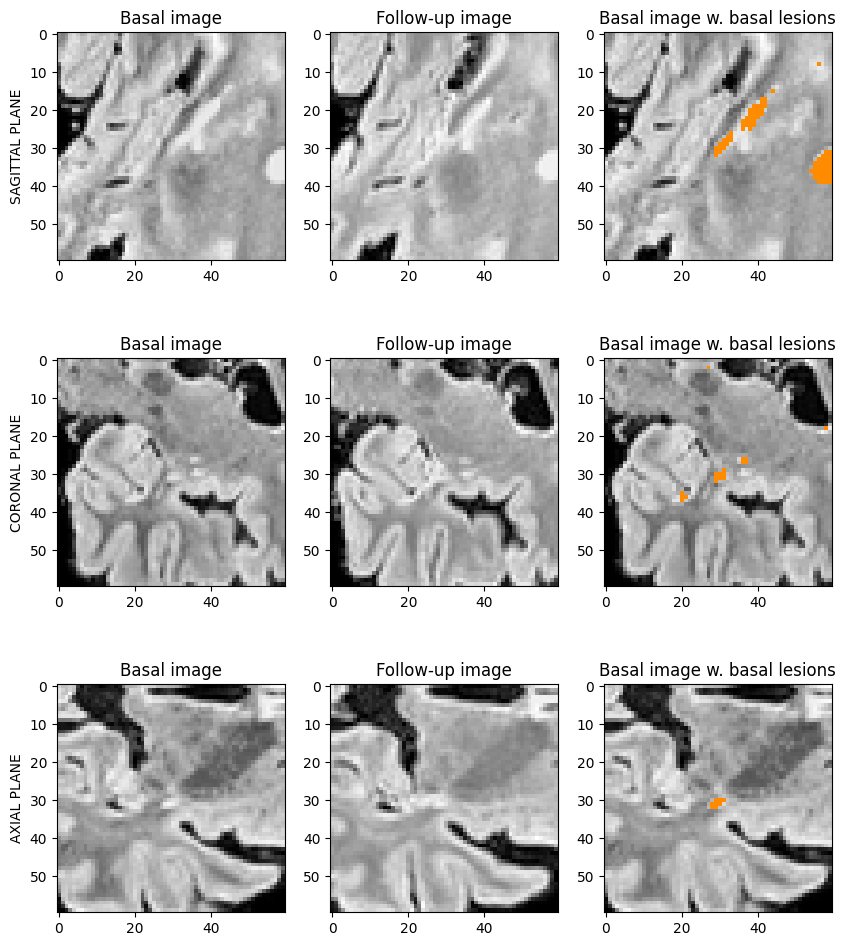

In [230]:
fig = plot_basal_lesion(b_im=sample_b_image, fu_im=sample_fu_image, labels=sample_labels,
                        central_voxel=sample_basal_lesion_central_voxel,
                        patch_size=30)

In [186]:
fig.savefig(ANALYSIS_DIR / f"{sample_case_id}_BASAL_{sample_basal_lesion_centroid}.png")

In [187]:
f"{sample_case_id}_BASAL_{sample_basal_lesion_centroid}.png"

'FIS_046_01_BASAL_(84, 126, 97).png'

#### Lesiones nuevas

In [ ]:
from custom_scripts.plotting import plot_new_lesion

In [371]:
new_lesion_locations = get_lesions_locations(labels=sample_labels, lesion_class=2)

In [381]:
def save_all_new_lesions(case_id, new_lesion_locs, basal_image, follow_image, labels):
    for new_lesion in new_lesion_locs.keys():
        new_lesion_central_voxel = random.choice(new_lesion_locs[new_lesion])
        new_lesion_centroid = tuple(np.mean(new_lesion_locs[new_lesion], axis=0).astype(int))
        figure = plot_new_lesion(b_im=basal_image, fu_im=follow_image, labels=labels,
                                 central_voxel=new_lesion_central_voxel, patch_size=30)
        _ = figure.savefig(ANALYSIS_DIR / f"{case_id}_NEW_{new_lesion_centroid}.png")
        plt.close()

In [382]:
save_all_new_lesions(case_id=sample_case_id, new_lesion_locs=new_lesion_locations,
                     basal_image=sample_b_image, follow_image=sample_fu_image, labels=sample_labels)

In [353]:
sample_new_lesion = random.choice(list(new_lesion_locations.keys()))
sample_new_lesion_central_voxel = random.choice(new_lesion_locations[sample_new_lesion])
sample_new_lesion_centroid = tuple(np.mean(new_lesion_locations[sample_new_lesion], axis=0).astype(int))
del new_lesion_locations[sample_new_lesion]
sample_new_lesion

1

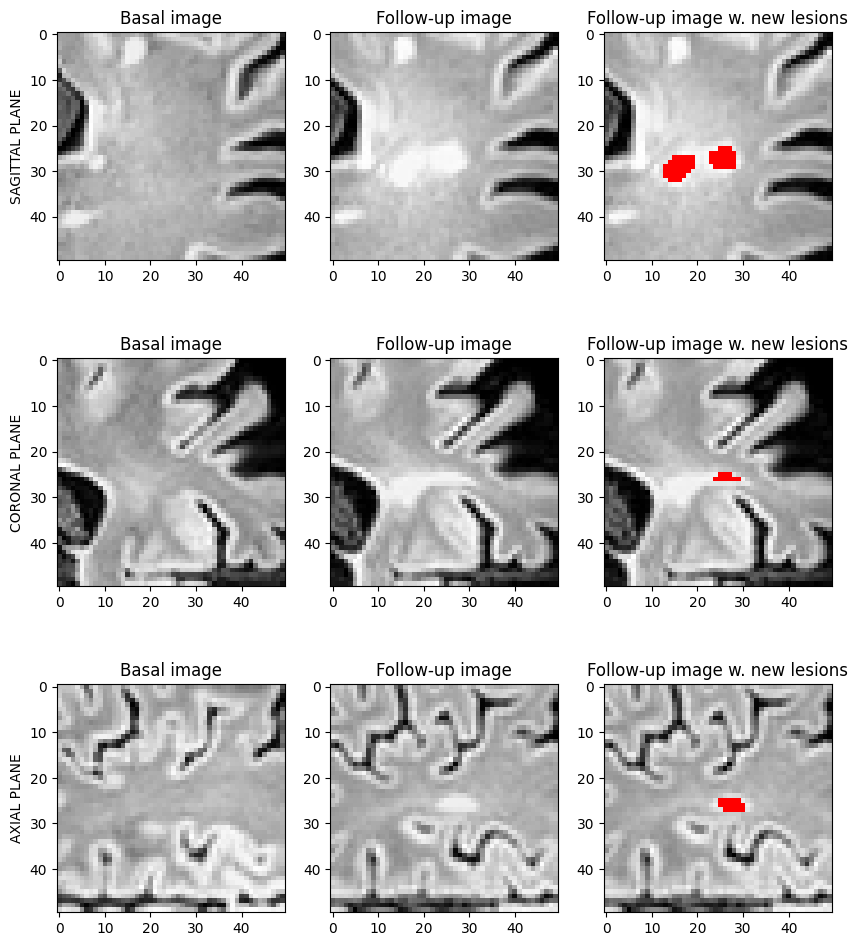

In [307]:
fig = plot_new_lesion(b_im=sample_b_image, fu_im=sample_fu_image, labels=sample_labels,
                      central_voxel=sample_new_lesion_central_voxel, patch_size=25)

In [308]:
fig.savefig(ANALYSIS_DIR / f"{sample_case_id}_NEW_{sample_new_lesion_centroid}.png")

In [309]:
f"{sample_case_id}_NEW_{sample_new_lesion_centroid}.png"

'FIS_046_01_NEW_(68, 93, 112).png'

In [ ]:
from custom_scripts.plotting import plot_both_lesions

In [383]:
def save_all_both_lesions(case_id, new_lesion_locs, basal_image, follow_image, labels):
    for new_lesion in new_lesion_locs.keys():
        new_lesion_central_voxel = random.choice(new_lesion_locs[new_lesion])
        new_lesion_centroid = tuple(np.mean(new_lesion_locs[new_lesion], axis=0).astype(int))
        figure = plot_both_lesions(b_im=basal_image, fu_im=follow_image, labels=labels,
                                   central_voxel=new_lesion_central_voxel, patch_size=30)
        _ = figure.savefig(ANALYSIS_DIR / f"{case_id}_BOTH_{new_lesion_centroid}.png")
        plt.close()

In [384]:
save_all_both_lesions(case_id=sample_case_id, new_lesion_locs=new_lesion_locations,
                      basal_image=sample_b_image, follow_image=sample_fu_image, labels=sample_labels)

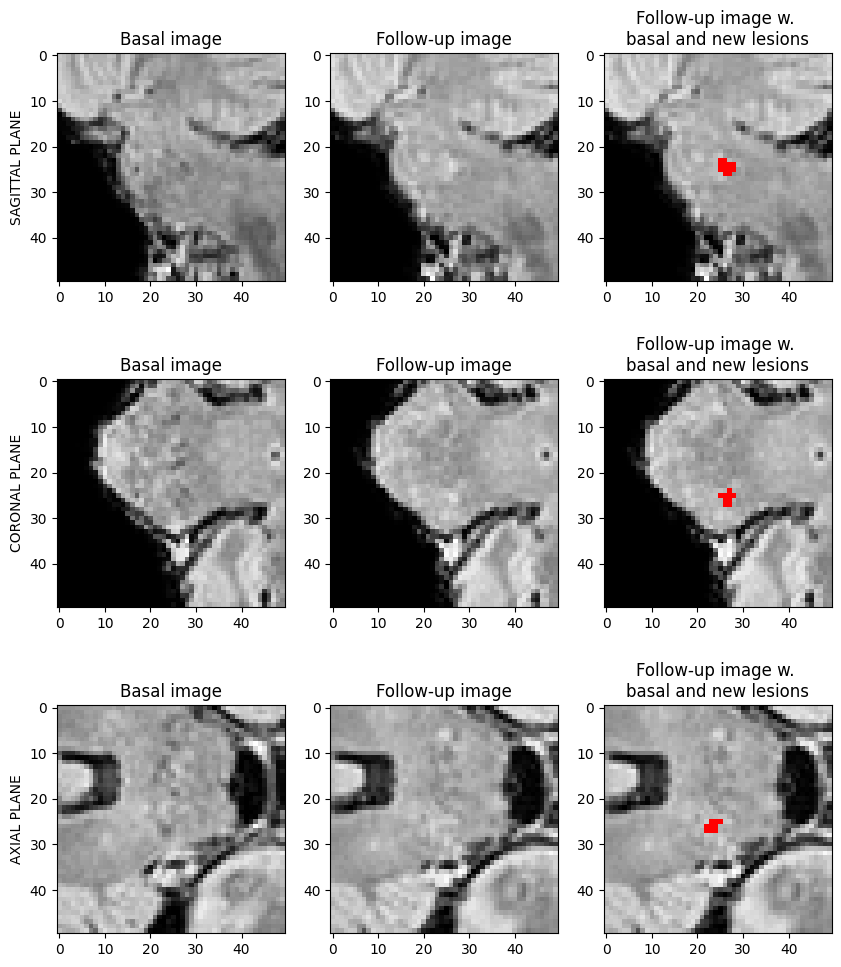

In [358]:
fig = plot_both_lesions(b_im=sample_b_image, fu_im=sample_fu_image, labels=sample_labels,
                        central_voxel=sample_new_lesion_central_voxel, patch_size=25)

In [303]:
fig.savefig(ANALYSIS_DIR / f"{sample_case_id}_BOTH_{sample_new_lesion_centroid}.png")

In [304]:
f"{sample_case_id}_BOTH_{sample_new_lesion_centroid}.png"

'FIS_046_01_BOTH_(75, 150, 87).png'